# Predicting Customer Churn in Banking Using Machine Learning

📘 Project Overview:
This project focuses on identifying the drivers of customer churn for a retail bank using supervised machine learning models. 
Customer churn — when a customer leaves a bank — is a key business challenge, as acquiring new customers is more expensive than retaining existing ones.

🔍 Business Objective:
- Understand patterns that lead to customer churn
- Use machine learning to predict which customers are most likely to leave
- Support the business with actionable insights for retention strategies

🎯 Goals:
- Perform exploratory data analysis (EDA) to uncover trends and risk factors
- Build and evaluate classification models to predict churn
- Interpret results to inform data-driven retention recommendations

🛠️ Tools & Techniques:
Python, pandas, seaborn, matplotlib, scikit-learn, feature selection (RFECV), ROC analysis, classification reports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from tabulate import tabulate
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import prince

# Data Preprocessing and Manipulation

In [2]:
datasetDW  =  pd.read_csv('train1.csv')
datasetDW.head()
print(datasetDW.shape)

datasetKaggle  =  pd.read_csv('train.csv')
datasetKaggle.head()
print(datasetKaggle.shape)

(10000, 14)
(165034, 14)


In [3]:
data_types = pd.DataFrame(datasetDW.dtypes, columns=['Data Type'])
data_types.reset_index(inplace=True)
data_types.columns = ['Column Name', 'Data Type']
print(tabulate(data_types, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------------+
| Column Name     | Data Type   |
|-----------------+-------------|
| RowNumber       | int64       |
| CustomerId      | int64       |
| Surname         | object      |
| CreditScore     | int64       |
| Geography       | object      |
| Gender          | object      |
| Age             | int64       |
| Tenure          | int64       |
| Balance         | float64     |
| NumOfProducts   | int64       |
| HasCrCard       | int64       |
| IsActiveMember  | int64       |
| EstimatedSalary | float64     |
| Exited          | int64       |
+-----------------+-------------+


In [4]:
data_types = pd.DataFrame(datasetKaggle.dtypes, columns=['Data Type'])
data_types.reset_index(inplace=True)
data_types.columns = ['Column Name', 'Data Type']
print(tabulate(data_types, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------------+
| Column Name     | Data Type   |
|-----------------+-------------|
| id              | int64       |
| CustomerId      | int64       |
| Surname         | object      |
| CreditScore     | int64       |
| Geography       | object      |
| Gender          | object      |
| Age             | float64     |
| Tenure          | int64       |
| Balance         | float64     |
| NumOfProducts   | int64       |
| HasCrCard       | float64     |
| IsActiveMember  | float64     |
| EstimatedSalary | float64     |
| Exited          | int64       |
+-----------------+-------------+


In [5]:
datasetKaggle.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
datasetDW.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
datasetKaggle['Age'] = datasetKaggle['Age'].astype('int64')
datasetKaggle['HasCrCard'] = datasetKaggle['HasCrCard'].astype('int64')
datasetKaggle['IsActiveMember'] = datasetKaggle['IsActiveMember'].astype('int64')

datasetKaggle.rename(columns={'id': 'RowNumber'}, inplace=True)

In [8]:
print(datasetKaggle.dtypes)
print(datasetDW.dtypes)


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [9]:
data = pd.concat([datasetKaggle, datasetDW], axis=0, ignore_index=True)

print(data.shape)

(175034, 14)


In [10]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,175034.000000,1.750340e+05,175034.000000,175034.000000,175034.000000,175034.000000,175034.00000,175034.000000,175034.00000,175034.000000,175034.000000
mean,78087.874704,1.569194e+07,656.115835,38.171355,5.019922,56678.299368,1.55307,0.751185,0.49876,111861.556577,0.211148
std,49640.515418,7.142890e+04,81.151171,8.969554,2.811136,62982.565768,0.54921,0.432327,0.50000,50815.382991,0.408124
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.00000,0.000000,0.00000,11.580000,0.000000
25%,33758.250000,1.563288e+07,597.000000,32.000000,3.000000,0.000000,1.00000,1.000000,0.00000,73192.370000,0.000000
50%,77516.500000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.00000,1.000000,0.00000,116969.730000,0.000000
75%,121274.750000,1.575666e+07,710.000000,42.000000,7.000000,120729.297500,2.00000,1.000000,1.00000,154767.340000,0.000000
max,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.00000,1.000000,1.00000,199992.480000,1.000000


In [12]:
columns_na = data.isna().any()
print(columns_na)

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool


In [13]:
X = data.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = data['Exited']

# Exploratory Data Analysis

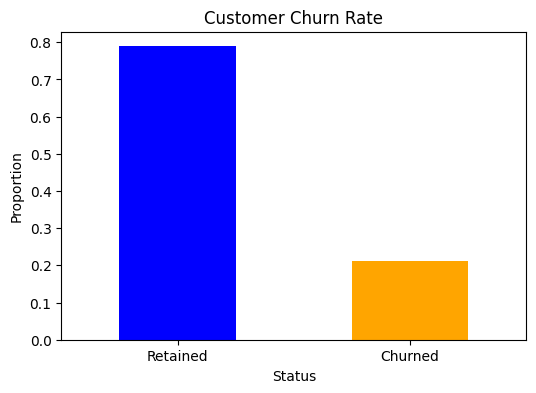

In [14]:
churn_rate = data['Exited'].value_counts(normalize=True)

churn_rate.index = churn_rate.index.map({0: 'Retained', 1: 'Churned'})

plt.figure(figsize=(6,4))
churn_rate.plot(kind='bar', color=['blue', 'orange'])
plt.title('Customer Churn Rate')
plt.xlabel('Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

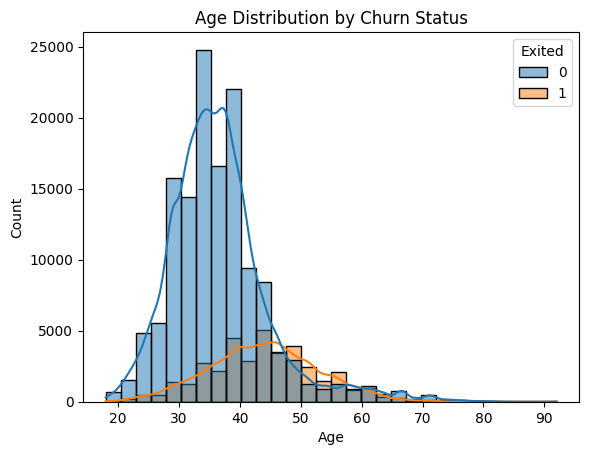

In [15]:
sns.histplot(data=data, x='Age', hue='Exited', kde=True, bins=30)
plt.title('Age Distribution by Churn Status')
plt.show()

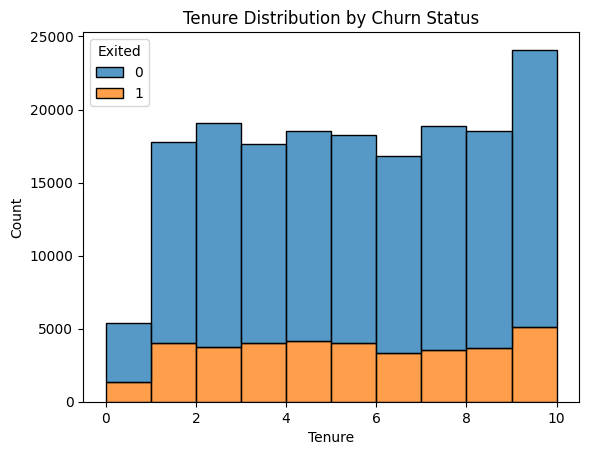

In [16]:
sns.histplot(data=data, x='Tenure', hue='Exited', bins=10, multiple='stack')
plt.title('Tenure Distribution by Churn Status')
plt.show()

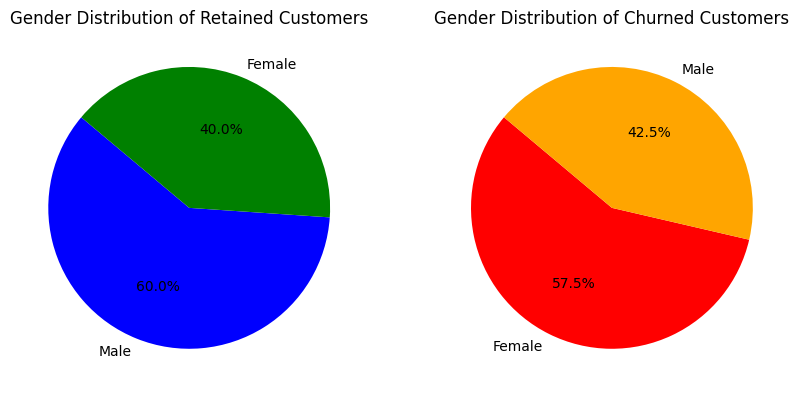

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

gender_retained_counts = data[data['Exited'] == 0]['Gender'].value_counts()
axs[0].pie(gender_retained_counts, labels=gender_retained_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'green'])
axs[0].set_title('Gender Distribution of Retained Customers')

gender_exited_counts = data[data['Exited'] == 1]['Gender'].value_counts()
axs[1].pie(gender_exited_counts, labels=gender_exited_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'orange'])
axs[1].set_title('Gender Distribution of Churned Customers')

plt.show()

In [18]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

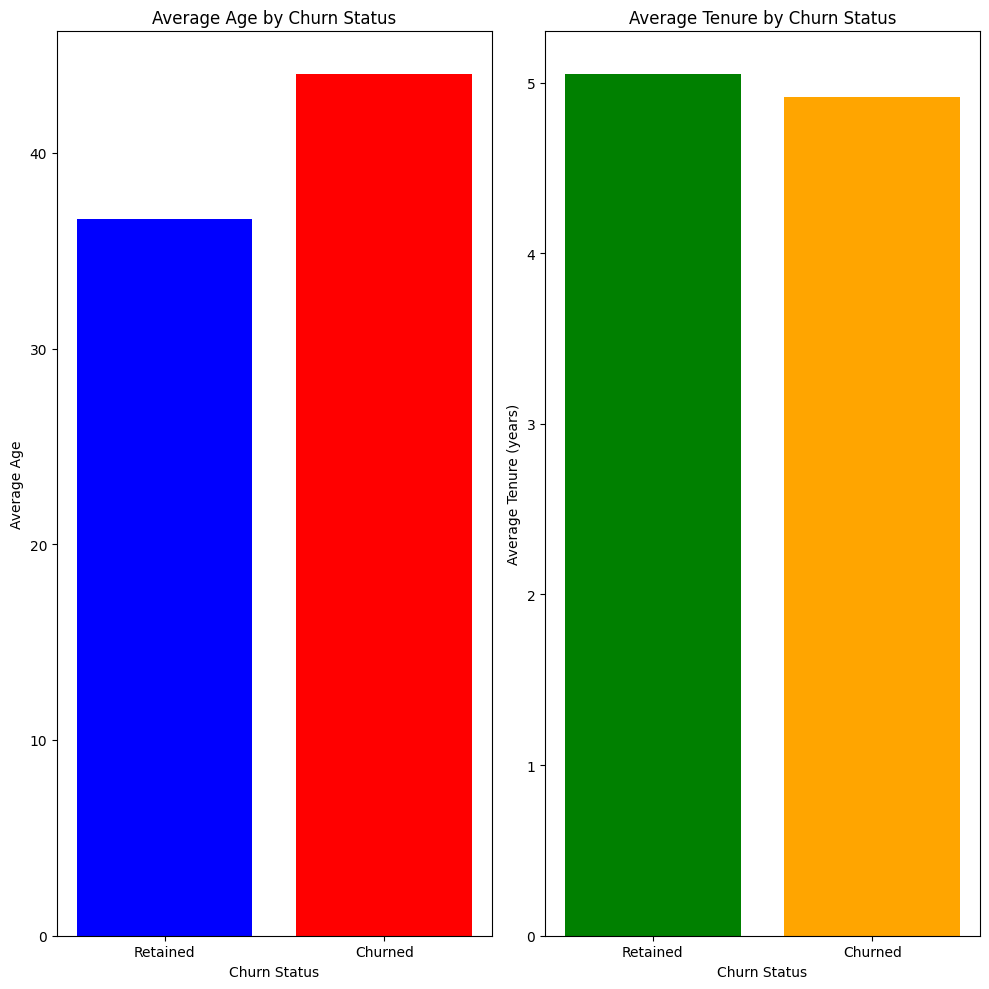

In [19]:
average_age = data.groupby('Exited')['Age'].mean()
average_tenure = data.groupby('Exited')['Tenure'].mean()

fig, axs = plt.subplots(1, 2, figsize=(10, 10))

# Bar graph for Average Age
axs[0].bar(['Retained', 'Churned'], average_age, color=['blue', 'red'])
axs[0].set_title('Average Age by Churn Status')
axs[0].set_xlabel('Churn Status')
axs[0].set_ylabel('Average Age')

# Bar graph for Average Tenure
axs[1].bar(['Retained', 'Churned'], average_tenure, color=['green', 'orange'])
axs[1].set_title('Average Tenure by Churn Status')
axs[1].set_xlabel('Churn Status')
axs[1].set_ylabel('Average Tenure (years)')

plt.tight_layout()
plt.show()


In [20]:
y.shape

(175034,)

In [21]:
categorical = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
numerical = ['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'NumOfProducts', 'Tenure']
print(categorical, numerical, sep = "\n")

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'NumOfProducts', 'Tenure']


# Feature Selection

In [22]:
def scaling_data(X, numerical, categorical):
    labelencoder = LabelEncoder()
    numerical_scaler = MaxAbsScaler()
    X[numerical] = numerical_scaler.fit_transform(X[numerical])
    varianceThreshold = VarianceThreshold(threshold=0.01).fit(X[numerical])
    mask = varianceThreshold.get_support()
    selected_columns = X[numerical].columns[mask]
    num = varianceThreshold.transform(X[numerical])
    numerical_df = pd.DataFrame(num, columns=selected_columns)

    for column in categorical:
        X[column] = labelencoder.fit_transform(X[column])
        
    print(numerical_df.columns)
    categorical_df = X[categorical].reset_index(drop=True)
    
    return pd.concat([numerical_df, categorical_df], axis=1)

In [23]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [24]:
data_df = scaling_data(data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1), numerical, categorical)
correlation_matrix = data_df.corr()
print(correlation_matrix)

Index(['Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure'], dtype='object')
                  Balance  EstimatedSalary  NumOfProducts    Tenure  \
Balance          1.000000         0.004397      -0.357269 -0.009662   
EstimatedSalary  0.004397         1.000000      -0.002427  0.001457   
NumOfProducts   -0.357269        -0.002427       1.000000  0.007721   
Tenure          -0.009662         0.001457       0.007721  1.000000   
Geography        0.132596        -0.005496      -0.023613  0.000465   
Gender          -0.013811        -0.007283       0.023270  0.009124   
HasCrCard       -0.020311         0.004932       0.005600  0.006410   
IsActiveMember  -0.014123        -0.008737       0.037824 -0.006878   

                 Geography    Gender  HasCrCard  IsActiveMember  
Balance           0.132596 -0.013811  -0.020311       -0.014123  
EstimatedSalary  -0.005496 -0.007283   0.004932       -0.008737  
NumOfProducts    -0.023613  0.023270   0.005600        0.037824  
Tenure         

# Correlation matrix

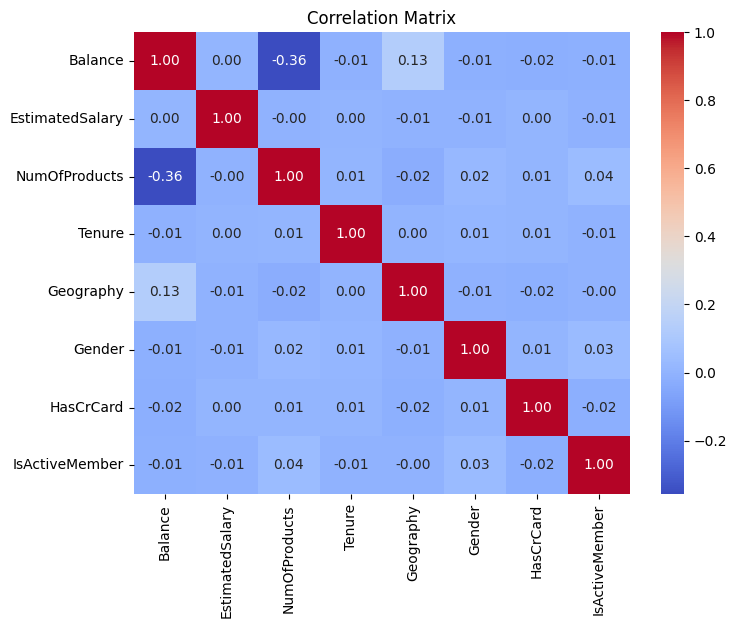

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [26]:
X = scaling_data(X, numerical, categorical)
X.head()

Index(['Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure'], dtype='object')


,Balance,EstimatedSalary,NumOfProducts,Tenure,Geography,Gender,HasCrCard,IsActiveMember
0,0.000000,0.907284,0.50,0.3,0,1,1,0
1,0.000000,0.247527,0.50,0.1,0,1,1,1
2,0.000000,0.924368,0.50,1.0,0,1,1,0
3,0.593398,0.422820,0.25,0.2,0,1,1,1
4,0.000000,0.075347,0.50,0.5,2,1,1,1


# Recursive Feature Selection with Cross Validation

In [27]:
cv = StratifiedKFold(n_splits=5)
model = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy', min_features_to_select=1)
rfecv.fit(X, y)


RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=42), scoring='accuracy')

C:\Users\athik\AppData\Local\Temp\ipykernel_13244\1978987960.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


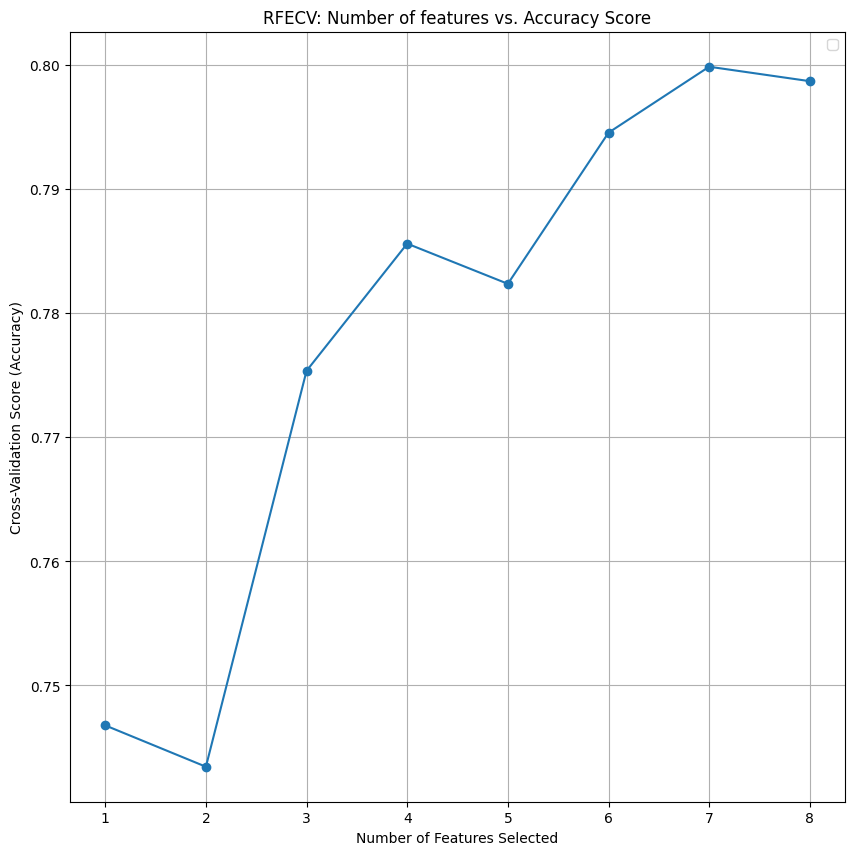

In [28]:
optimal_number_of_features = rfecv.n_features_
mean_scores = rfecv.cv_results_['mean_test_score']

plt.figure(figsize=(10, 10))
plt.plot(range(1, len(mean_scores) + 1), mean_scores, marker='o')
plt.title("RFECV: Number of features vs. Accuracy Score")
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score (Accuracy)")
plt.grid(True)
plt.legend()
plt.show()

In [36]:
selected_features = X.columns[rfecv.support_]
X_selected = X[selected_features]
print(X_selected.shape)

IndexError: boolean index did not match indexed array along axis 0; size of axis is 5 but size of corresponding boolean axis is 8

In [ ]:
print(X_selected.columns)

# FAMD

In [31]:
def perform_famd(X):
    famd = prince.FAMD(
    n_components=5,
    n_iter=3, 
    copy=True,
    check_input=True,
    random_state=42
    )
    famd_classifier = famd.fit(X)
    return famd_classifier

In [34]:
famd = perform_famd(X)
X = famd.transform(X)

ValueError: All variables are quantitative: PCA should be used

In [ ]:
print(X.columns)

# Train-Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [33]:
selector = SelectKBest(chi2, k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

c:\users\athik\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


In [34]:
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure', 'Geography',
       'Gender', 'HasCrCard', 'IsActiveMember'],
      dtype='object')


# Model Classifiers

In [35]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

# Training the model

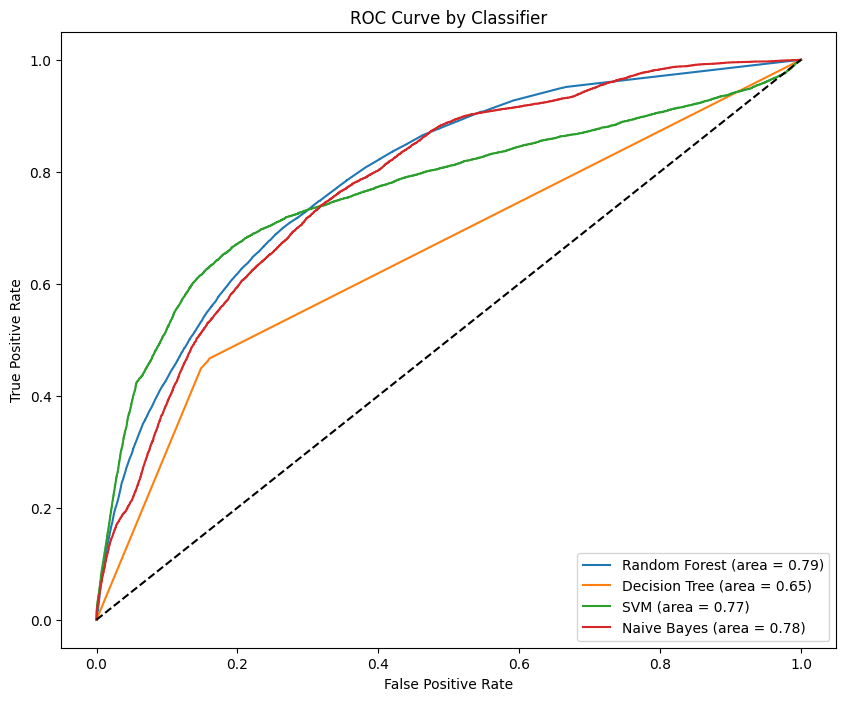

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     41423
           1       0.53      0.43      0.48     11088

    accuracy                           0.80     52511
   macro avg       0.70      0.67      0.68     52511
weighted avg       0.79      0.80      0.79     52511



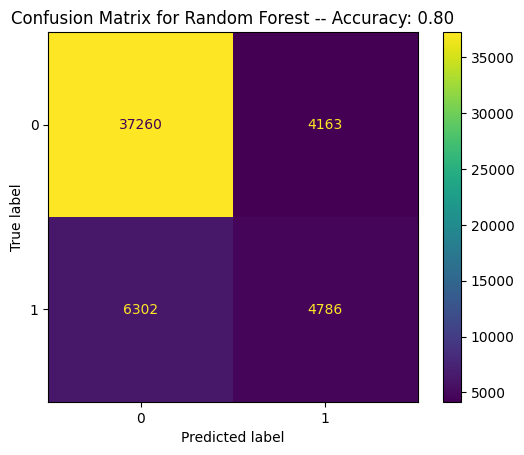

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     41423
           1       0.45      0.45      0.45     11088

    accuracy                           0.77     52511
   macro avg       0.65      0.65      0.65     52511
weighted avg       0.77      0.77      0.77     52511



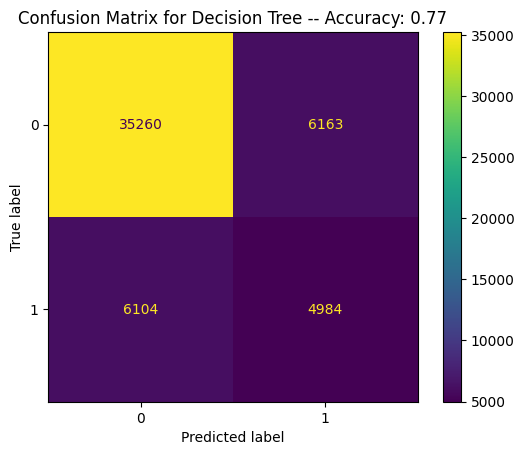

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     41423
           1       0.67      0.41      0.51     11088

    accuracy                           0.83     52511
   macro avg       0.76      0.68      0.70     52511
weighted avg       0.82      0.83      0.82     52511



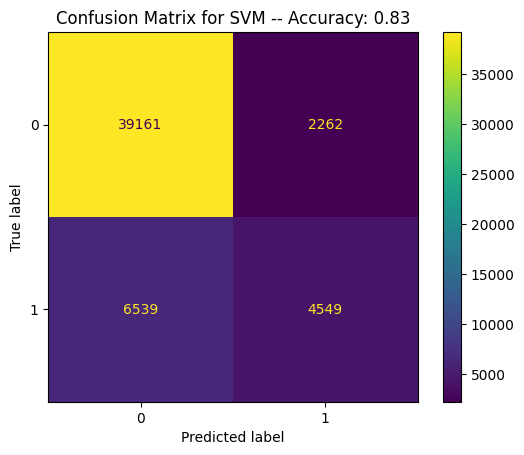

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     41423
           1       0.55      0.20      0.29     11088

    accuracy                           0.80     52511
   macro avg       0.68      0.58      0.59     52511
weighted avg       0.76      0.80      0.76     52511



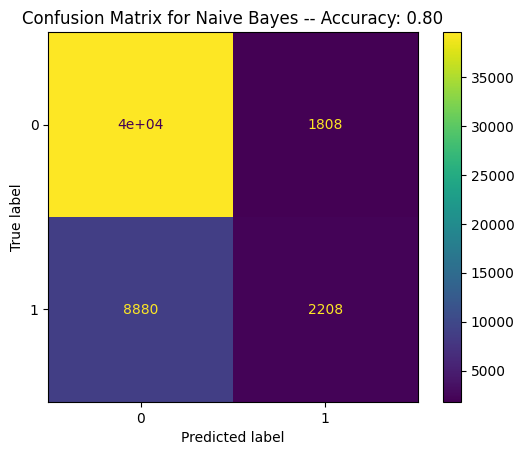

In [36]:
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve by Classifier')
plt.legend(loc="lower right")
plt.savefig('roc_curves_test.png')
plt.show()

# Display confusion matrices
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    accuracy = accuracy_score(y_test, y_pred)
    plt.title(f'Confusion Matrix for {name} -- Accuracy: {accuracy:.2f}')
    plt.savefig(f'confusion_matrix_{name}.png')
    plt.show()


# Loading the Test Data

In [40]:
test_data =  pd.read_csv('test.csv')
test_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,10001,15798485,Copley,565,France,Male,31,1,0.00,1,0,1,20443.08,0
1,10002,15588959,T'ang,569,France,Male,34,4,0.00,1,0,1,4045.90,0
2,10003,15624896,Ku,669,France,Female,20,7,0.00,2,1,0,128838.67,0
3,10004,15639629,McConnan,694,France,Male,39,4,173255.48,1,1,1,81293.10,0
4,10005,15638852,Ts'ui,504,Spain,Male,28,10,109291.36,1,1,1,187593.15,0


In [41]:
columns_na = test_data.isna().any()
print(columns_na)

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool


In [42]:
X_test = test_data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

In [43]:
y_test = test_data['Exited']

In [44]:
X_test = scaling_data(X_test, numerical, categorical)
X_test.head()

Index(['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'NumOfProducts',
       'Tenure'],
      dtype='object')


,Age,Balance,CreditScore,EstimatedSalary,NumOfProducts,Tenure,Geography,Gender,HasCrCard,IsActiveMember
0,0.340659,0.000000,0.664706,0.102403,0.25,0.1,0,1,0,1
1,0.373626,0.000000,0.669412,0.020267,0.25,0.4,0,1,0,1
2,0.219780,0.000000,0.787059,0.645375,0.50,0.7,0,0,1,0
3,0.428571,0.819096,0.816471,0.407211,0.25,0.4,0,1,1,1
4,0.307692,0.516695,0.592941,0.939687,0.25,1.0,2,1,1,1


In [46]:
X_test = selector.transform(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age
- CreditScore


# Testing the model

In [ ]:
plt.figure(figsize=(10, 10))
for name, model in models.items():
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve by Classifier')
plt.legend(loc="lower right")
plt.savefig('roc_curves_finaltest.png')
plt.show()

# Display confusion matrices
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    accuracy = accuracy_score(y_test, y_pred)
    plt.title(f'Confusion Matrix for {name} -- Accuracy: {accuracy:.2f}')
    plt.savefig(f'confusion_matrix_final_{name}.png')
    plt.show()
